<a href="https://colab.research.google.com/github/jerry-simon/Data_Science_And_Machine_Learning/blob/main/LoanTap_BusinessCase_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

LoanTap is an online platform committed to delivering customized loan products to millennials. They offer flexible and instant loans on consumer friendly terms to salaried professionals and businessmen. The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals. This case study will focus on the underwriting process behind Personal Loan only.

> Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

In [ ]:
#importing the necessary library files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the csv file and displaying the contents of it.
df = pd.read_csv("logistic_regression.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
#Checking the shape of the LoanTap dataset
df.shape

(396030, 27)

There are 396030 records present in the LoanTap dataset with 27 columns/ features in it.

In [ ]:
#To display some of the basic information related to the LoanTap dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

The dataset comprises 396030 records, indexed from 0 to 396029, and includes a total of 27 columns. The dataset consists of the following 2 datatypes float and object. Notably, the dataset is suffering from missing values from columns such as **emp_title, emp_length, title, revol_util, mort_acc, and pub_rec_bankruptcies**. Last but not least, the total memory usage of the dataset is 81.6 KB.

In [ ]:
#To check the number of null values present in the given dataset
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


The dataset is suffering from missing values from columns such as emp_title, emp_length, title, revol_util, mort_acc, and pub_rec_bankruptcies.

In [ ]:
#to get the statistical summary of the LoanTap dataset for continous variables
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


Since there are many column's in the given dataset we will only focus a few of them.

<B>loan_amnt</B> - The average of the loan amount is 14,113.8. The minimum value of this column is 500 and the maximum value of this column is 40,000.

<B>int_rate</B> - The inerest rate has an average of 13.63. The lower value of this column is 5.32 and the maximum value is 30.99.

<B>installment</B> - This column has an average of 431.84 along with the minimum value is 16 and the maximum value is 1533.81.

<B>annual_inc</B> - This column has a maximum value of 8.7xe^6 and a minimum value of 0. However, the average of the column is 7.4xe^4.

<B>dti</B> - The average of this column is 17.37. The minimum and the maximum value of this column is 0 and 9999.

In [ ]:
#to get the statistical summary of the LoanTap dataset for object variables
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394274,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48816,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


The above mentioned table consists of the statistical summary of the categorical columns and they imply the following :

<B>term</B> - it contains 2 values and out of which 36 months is the most frequent one with a frequency of 302005.

<B>grade</B> - A 7 values category column with a top most frequent value of B that occuring 110618.

<B>sub_grade</B> - It contains 35 different values with the top most value is given to be B3 and has a value of 26655.

<B>emp_title</B> - The most frequent employee title is Teacher and has 17,3105 variety jobs in it.

<B>emp_length</B> - 11 distinct values with the most frequent one as 10+ years.

<B>home_ownership</B> - 6 independent values and the most frequent one is Mortgage.

In [ ]:
#Converting relevant object columns into categorical columns
df['term'] = df['term'].astype('category')
df['grade'] = df['grade'].astype('category')
df['sub_grade'] = df['sub_grade'].astype('category')
df['emp_length'] = df['emp_length'].astype('category')
df['home_ownership'] = df['home_ownership'].astype('category')
df['verification_status'] = df['verification_status'].astype('category')
df['issue_d'] = df['issue_d'].astype('category')
df['loan_status'] = df['loan_status'].astype('category')
df['purpose'] = df['purpose'].astype('category')
df['title'] = df['title'].astype('category')
df['earliest_cr_line'] = df['earliest_cr_line'].astype('category')
df['initial_list_status'] = df['initial_list_status'].astype('category')
df['application_type'] = df['application_type'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   loan_amnt             396030 non-null  float64 
 1   term                  396030 non-null  category
 2   int_rate              396030 non-null  float64 
 3   installment           396030 non-null  float64 
 4   grade                 396030 non-null  category
 5   sub_grade             396030 non-null  category
 6   emp_title             373103 non-null  object  
 7   emp_length            377729 non-null  category
 8   home_ownership        396030 non-null  category
 9   annual_inc            396030 non-null  float64 
 10  verification_status   396030 non-null  category
 11  issue_d               396030 non-null  category
 12  loan_status           396030 non-null  category
 13  purpose               396030 non-null  category
 14  title                 394274 non-nul

Relevant object columns has converted into categorical columns.

## Univariate Analysis

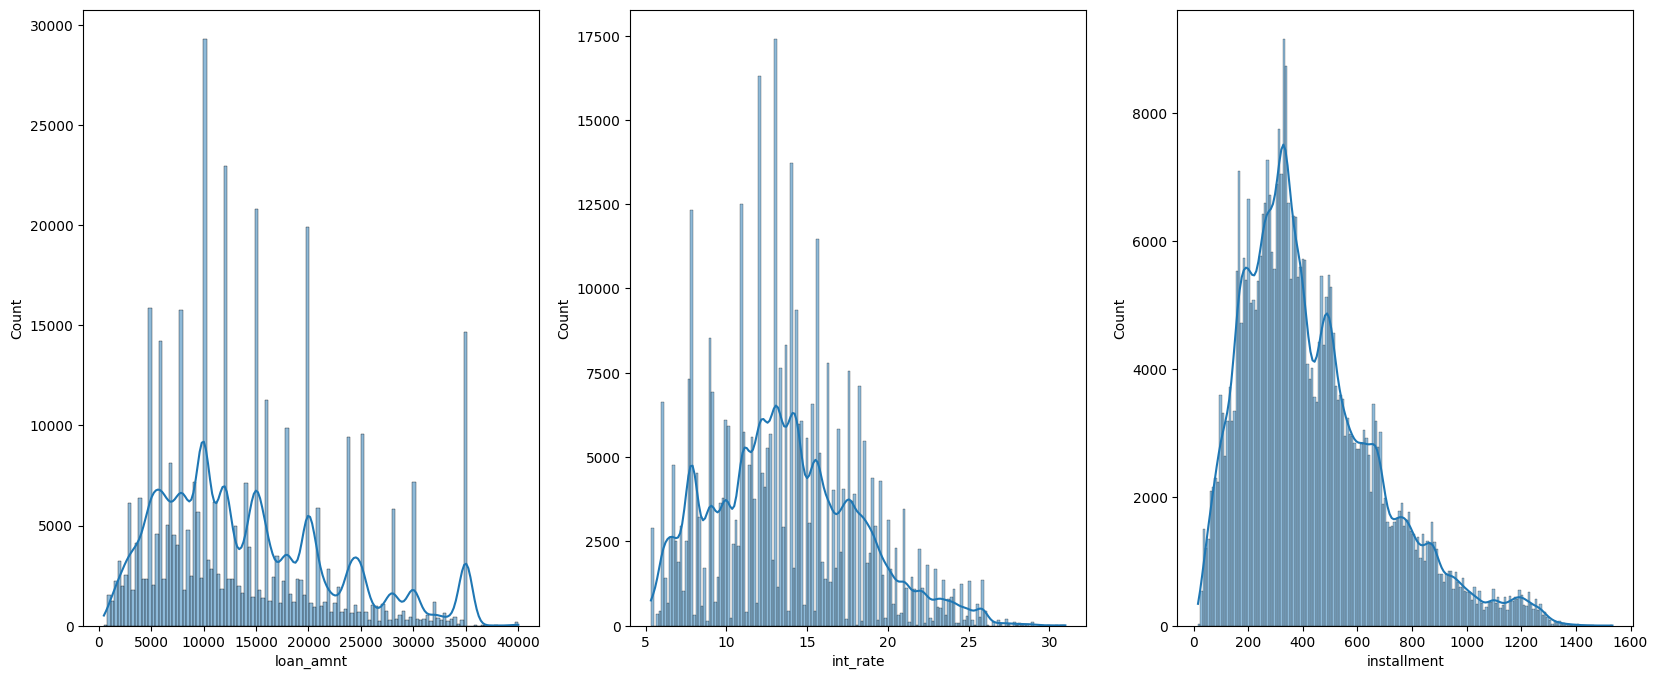

In [ ]:
#histogram for loan amount, interest rate and installment.
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
sns.histplot(data=df, x="loan_amnt", kde=True, ax=ax[0])
sns.histplot(data=df, x="int_rate", kde=True, ax=ax[1])
sns.histplot(data=df, x="installment", kde=True, ax=ax[2])
plt.show()

The histograms for **loan_amnt** and **int_rate** exhibit a right-skewed distribution with noticeable fluctuations, characterized by frequent spikes and dips. This pattern is common in real-world data, reflecting practical trends. From the **loan tap dataset**, it can be inferred that the majority of loan applicants prefer smaller loan amounts. Consequently, smaller loan amounts are associated with lower interest rates.

**Installments** follow a right skewed histogram pattern with payments following a range between 0 to 1600. There's a gradual rise and fall in the installment rate.

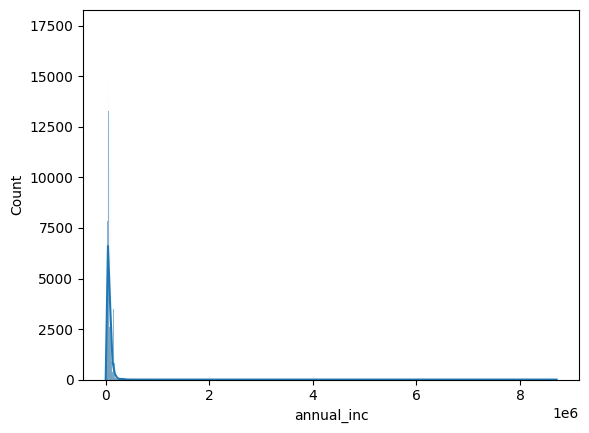

In [ ]:
#A histogram for the distribution of applicant's annual income
sns.histplot(data=df, x="annual_inc", kde=True)
plt.show()

Applicant income also follows a right skewed nature where most of the values lies in between 0xe^6 to 2xe^6.

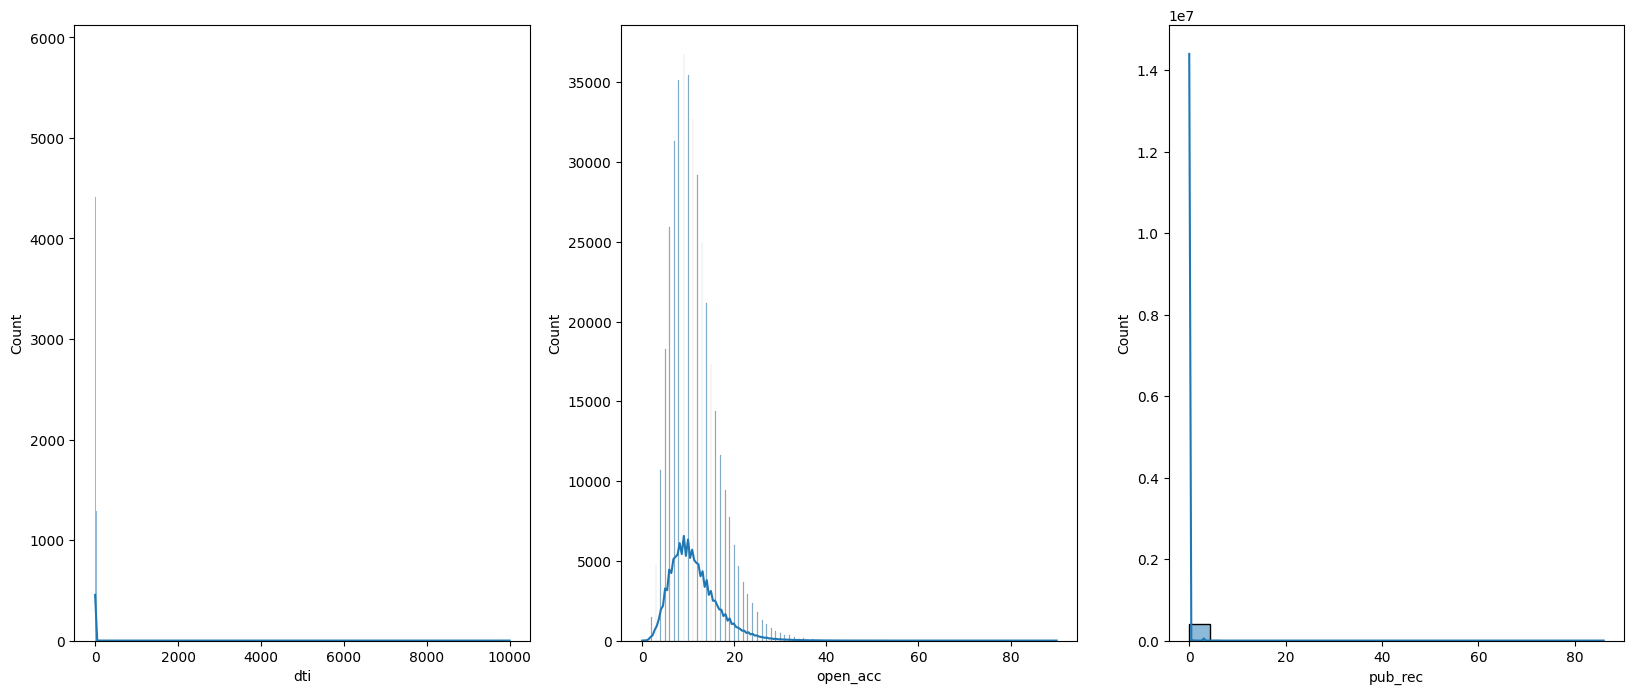

In [ ]:
#histogram for dti, open account and pub rec.
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
sns.histplot(data=df, x="dti", kde=True, ax=ax[0])
sns.histplot(data=df, x="open_acc", kde=True, ax=ax[1])
sns.histplot(data=df, x="pub_rec", kde=True, ax=ax[2])
plt.show()

dti, open account, pub_rec all the three follows a right skewed nature in which there's a spike for lower values. However, rest of the values are occuring only few times in the dataset.

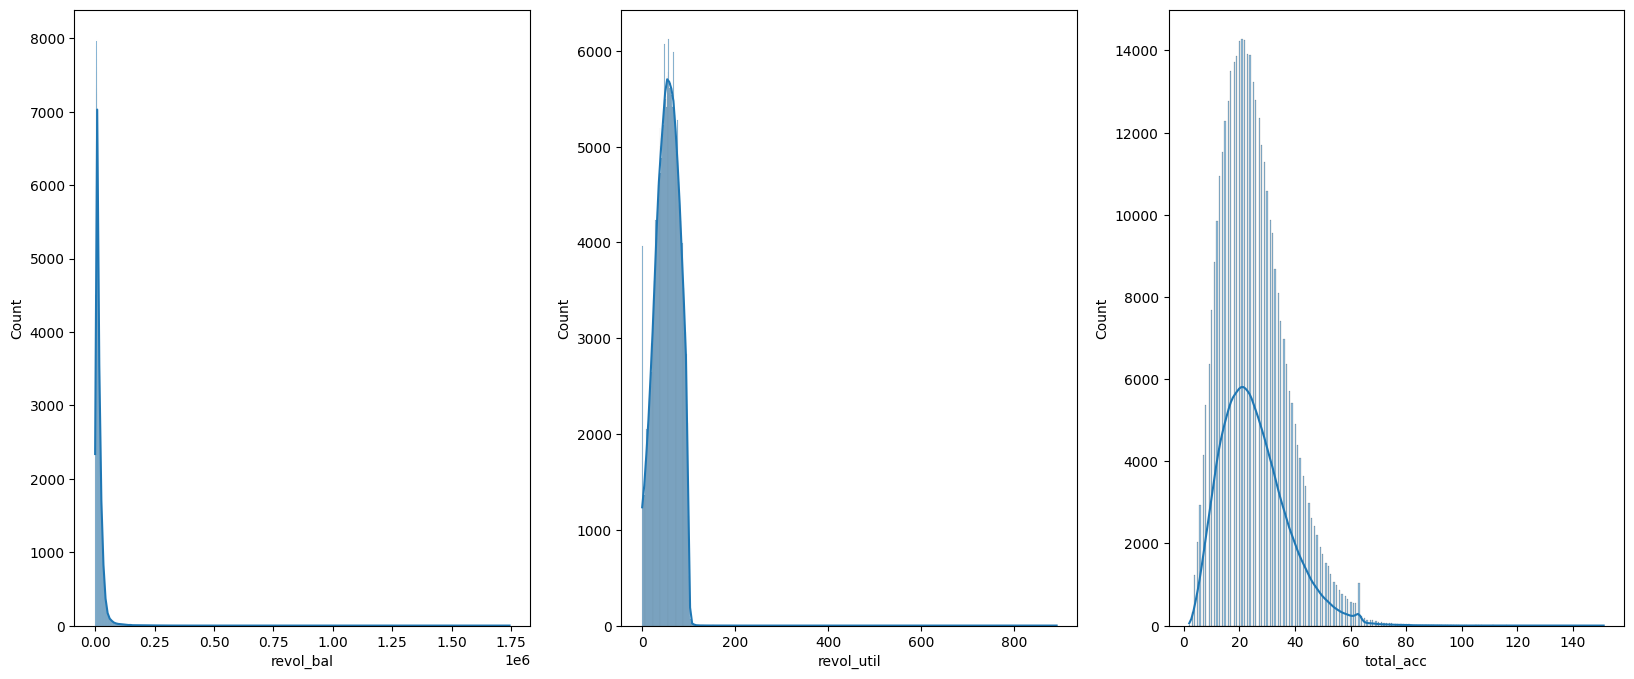

In [ ]:
#histogram for revol_bal, revol_util and total_acc.
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
sns.histplot(data=df, x="revol_bal", kde=True, ax=ax[0])
sns.histplot(data=df, x="revol_util", kde=True, ax=ax[1])
sns.histplot(data=df, x="total_acc", kde=True, ax=ax[2])
plt.show()

revolving balance, revolving util, total account all the three follows a right skewed nature in which there's a spike for lower values. However, rest of the values are occuring only few times in the dataset.

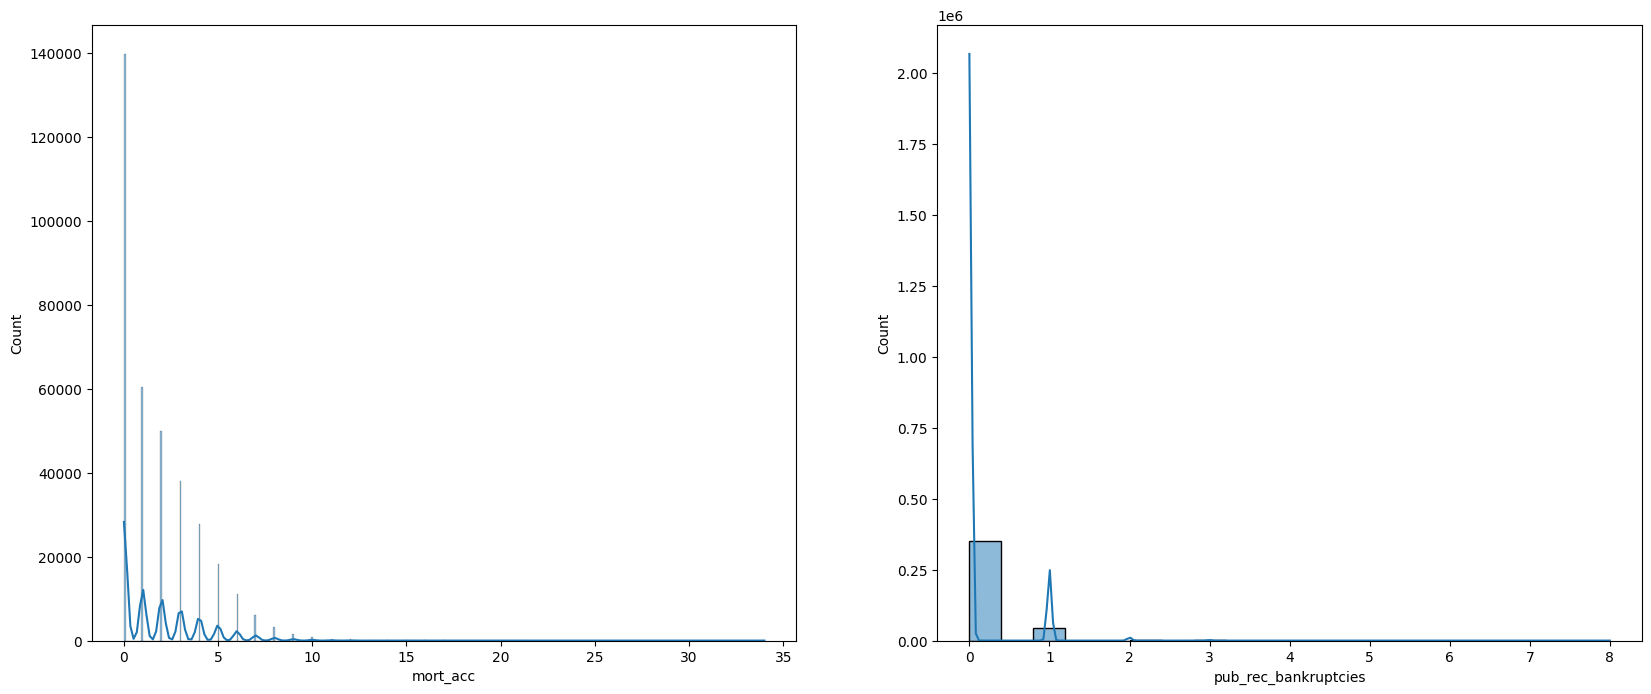

In [ ]:
#histogram for mort_acc and pub_rec_bankruptcies.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.histplot(data=df, x="mort_acc", kde=True, ax=ax[0])
sns.histplot(data=df, x="pub_rec_bankruptcies", kde=True, ax=ax[1])
plt.show()

mortgage account, and pub_rec_bankruptcies both of them follows a right skewed nature in which there's a spike for lower values. However, rest of the values are occuring only few times in the dataset.

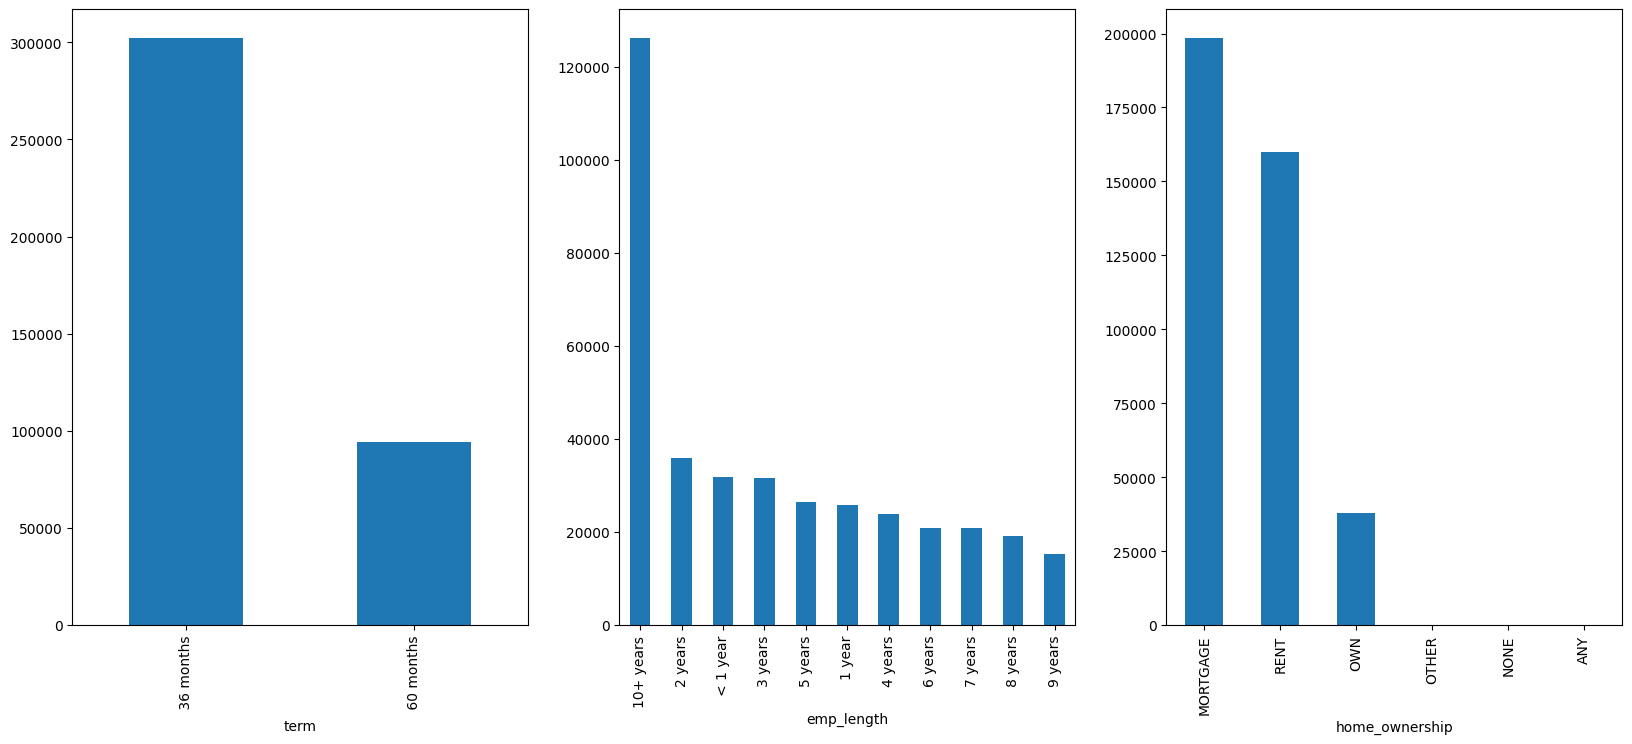

In [ ]:
#Countplot for term, emp_length and home_ownership
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
df['term'].value_counts().plot(kind='bar',ax=ax[0])
df['emp_length'].value_counts().plot(kind='bar',ax=ax[1])
df['home_ownership'].value_counts().plot(kind='bar',ax=ax[2])
plt.show()

<B>term</B> - The presence of 36 months is high in the dataset.

<B>emp_length</B> - The employee length has highest occurance of 10+ years followed by 2 years and less than 1 year.

<B>home_ownership</B> - Mortgage, Rent and Own are the highest number of home ownership's in the given dataset.

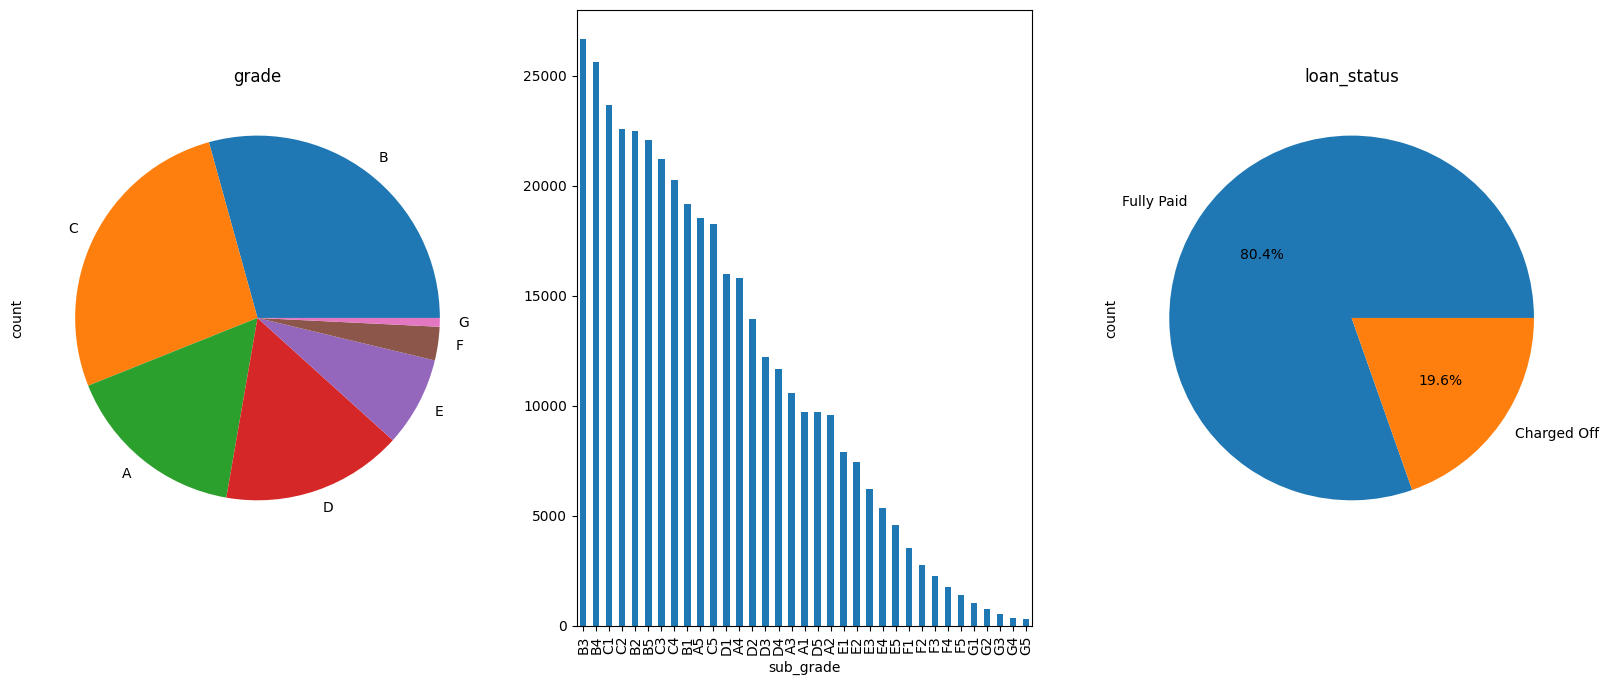

In [ ]:
#Countplot for grade, sub_grade and loan_status
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
df['grade'].value_counts().plot(kind='pie',ax=ax[0],title='grade')
df['sub_grade'].value_counts().plot(kind='bar',ax=ax[1])
df['loan_status'].value_counts().plot(kind='pie',ax=ax[2],title='loan_status',autopct='%1.1f%%')
plt.show()

**Grade** - It seems like the major contributions of the grade is **B** followed by **C** and then **A**.

**Sub_grade** - Out of all the sub grade categories **B3, B4, and C1** are the top three sub_grade categories available in the loan tap dataset.

**Loan Status** - It seems like presence of fully paid applicants outweighs the charged off applicants.

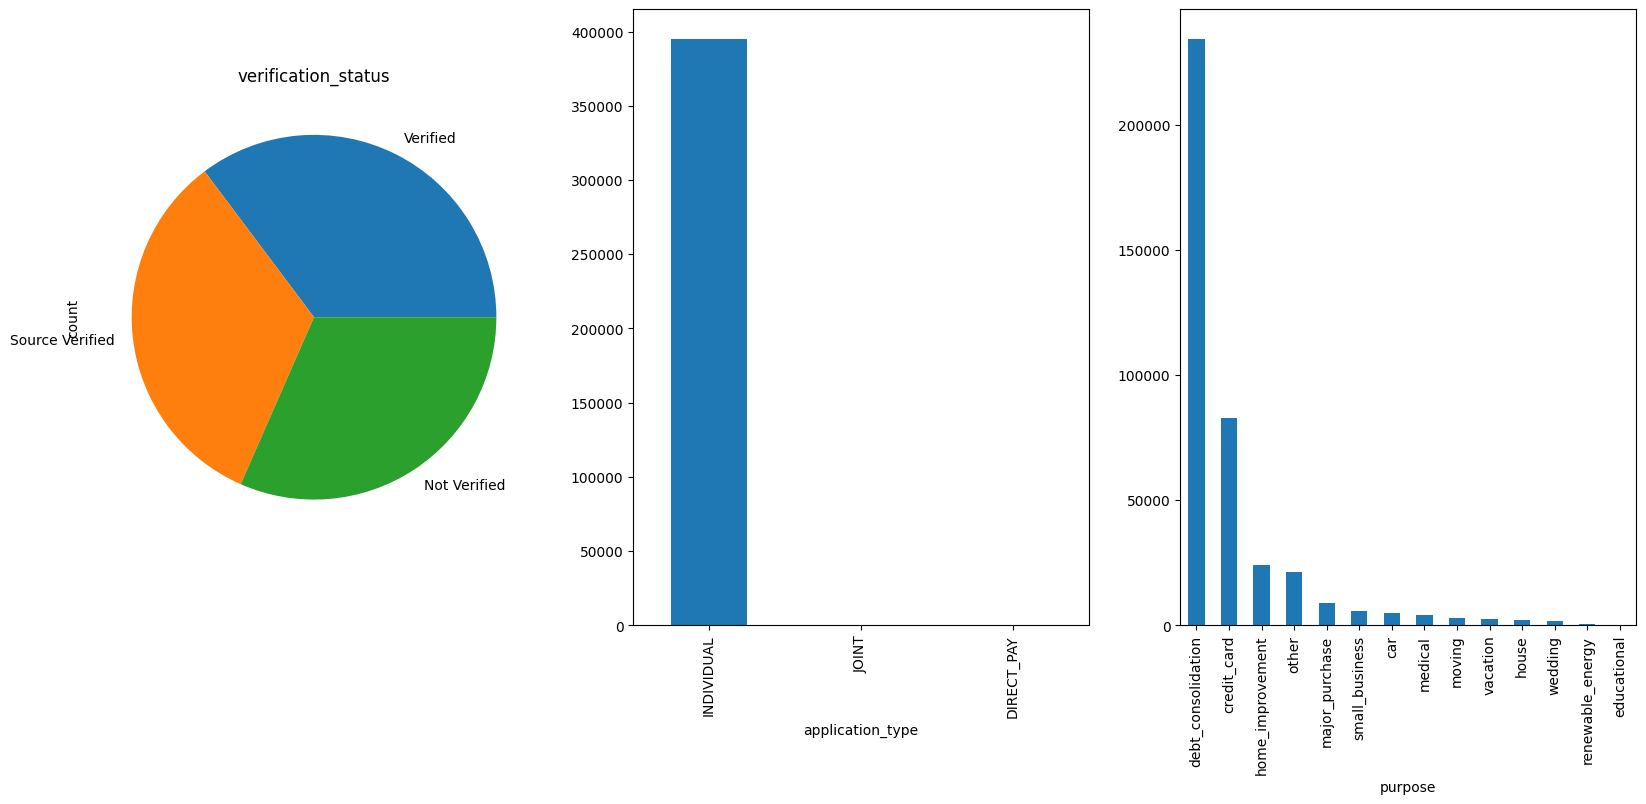

In [ ]:
#Countplot for verification status, application_type and purpose
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
df['verification_status'].value_counts().plot(kind='pie',ax=ax[0],title='verification_status')
df['application_type'].value_counts().plot(kind='bar',ax=ax[1])
df['purpose'].value_counts().plot(kind='bar',ax=ax[2])
plt.show()

**Verification Status** - It seems like the presence of Verified, Not Verified and Source Verified are equallly contributed to the loan tap dataset.

**Applicant type** -The major contribution of the individual applicant type is exremely high in the loantap dataset.

**Purpose** - Almost all the applicant's purpose is for consolidating their debt, credit card and improving their loan.

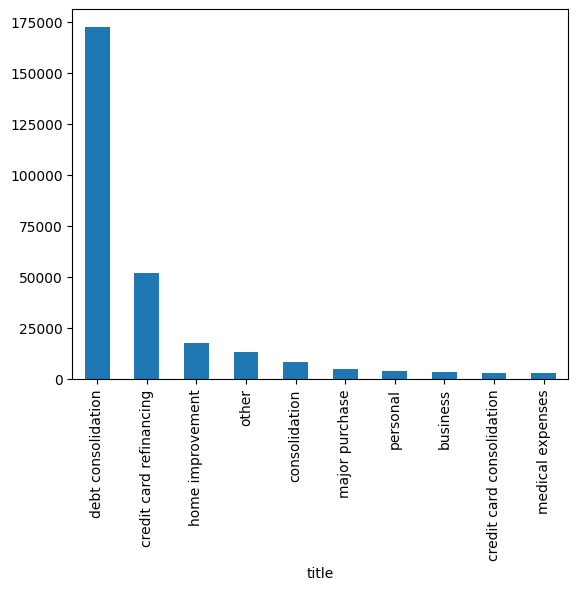

In [ ]:
#Countplot for the title provided by the borrower
df['title'] = df['title'].str.lower()
df['title'] = df['title'].str.replace('loan','')
df['title'] = df['title'].str.strip()
df['title'].value_counts().head(10).plot(kind='bar')
plt.show()

Almost all the applicants recieve their loan under the name of debt consolidation, credit card refinancing and home improvement. From this we can assume that all the applicants recieve their loan under the same title for which they have applied for.

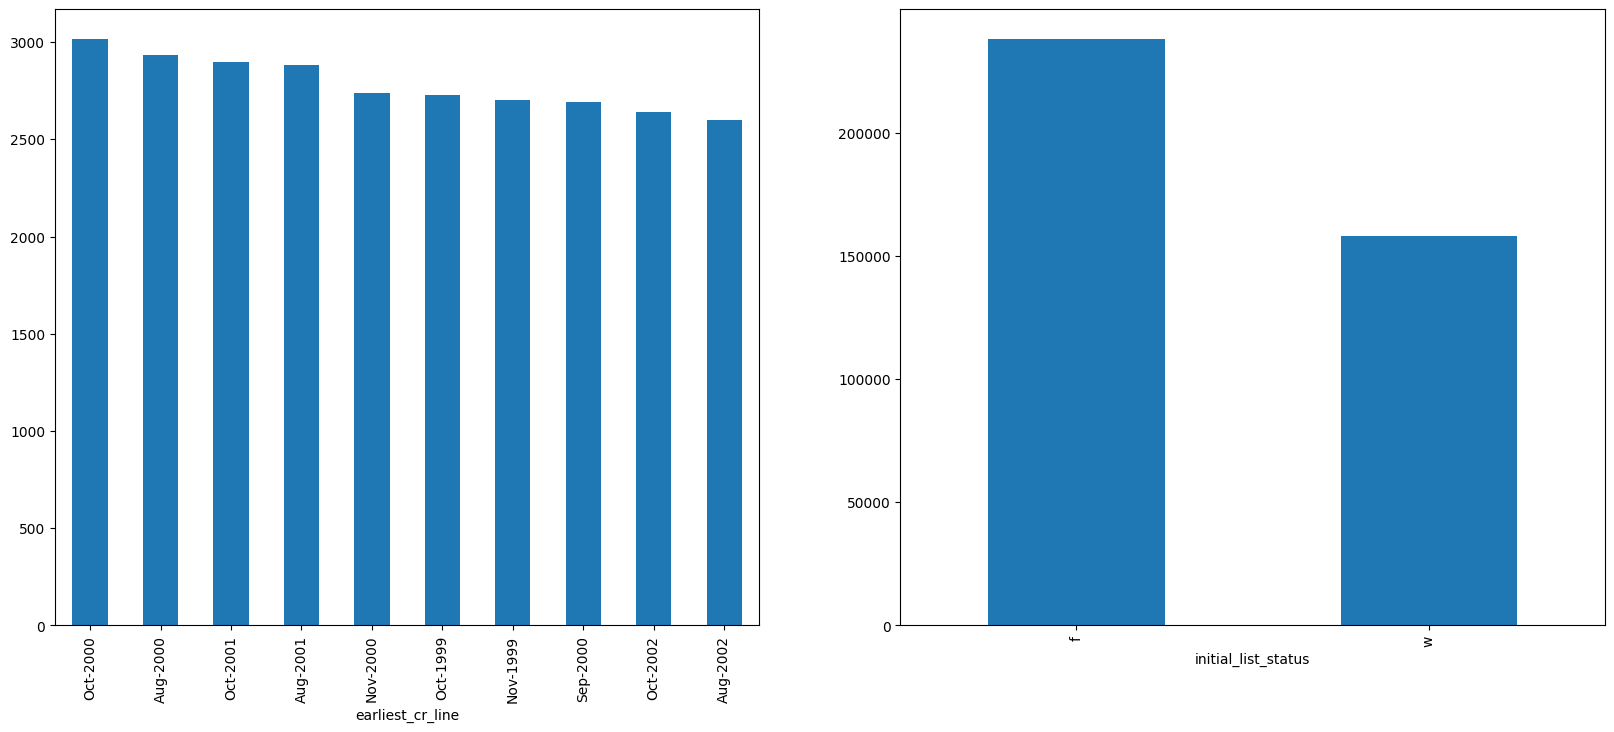

In [ ]:
#Countplot for the earliest credit line and initial list status.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
df['earliest_cr_line'].value_counts().head(10).plot(kind='bar',ax=ax[0])
df['initial_list_status'].value_counts().plot(kind='bar',ax=ax[1])
plt.show()

**Earliest credit line** - It seems like the majority of the credit lines were occured in October 2000, August 2000 and October 2001.

**Initial list status** - It seems like fixed initial list status has outweighed the waived initial list status.

## Bivariate Analysis

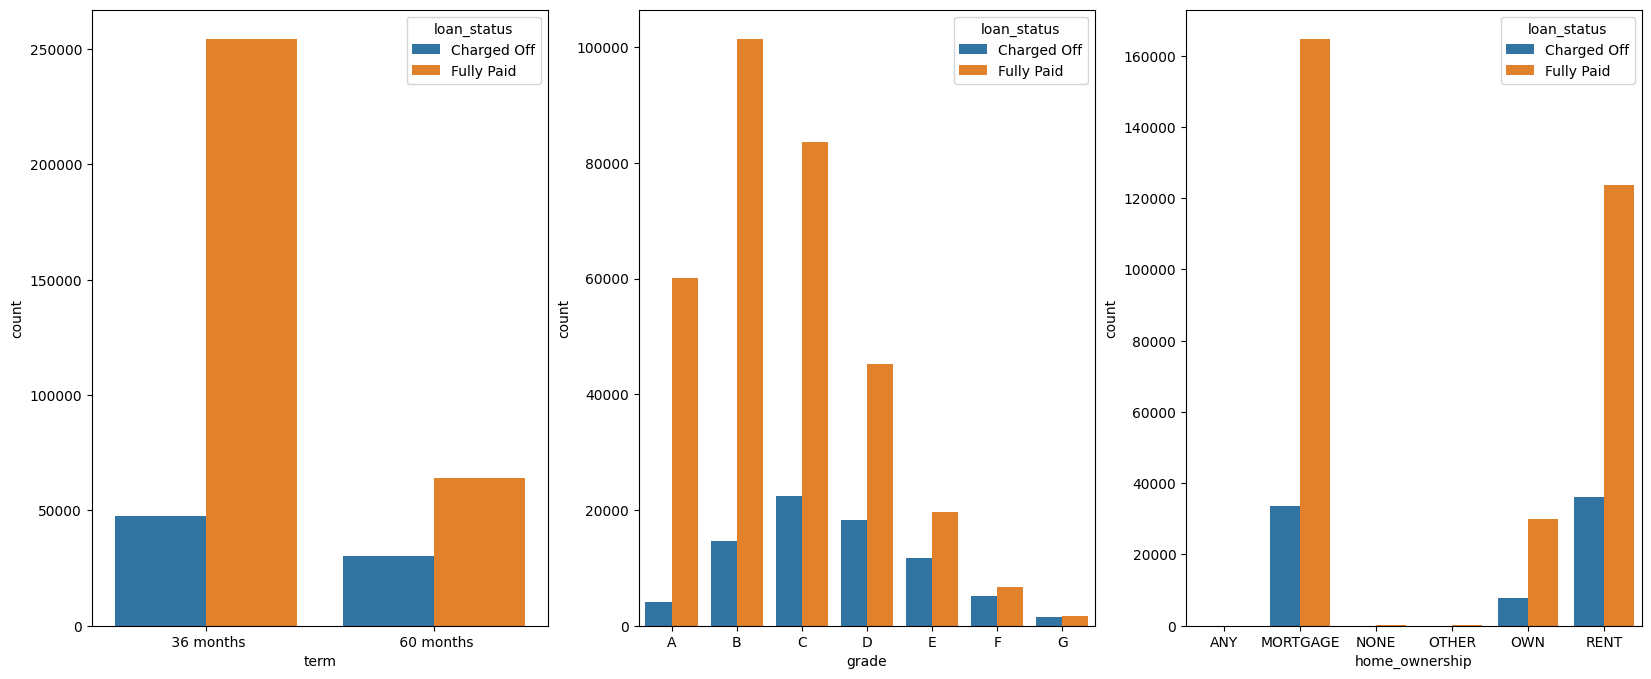

In [ ]:
#A compartive plot for loan status vs term, grade and home ownership
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
sns.countplot(data=df,x='term',hue='loan_status',ax=ax[0])
sns.countplot(data=df,x='grade',hue='loan_status',ax=ax[1])
sns.countplot(data=df,x='home_ownership',hue='loan_status',ax=ax[2])
plt.show()

Out of the three graphs it seems like fully paid customers are higher in all the categories. For instance, let's consider the grah term vs loan status, both 36 months and 60 months has shown significant amount of customers who has fully paid their loan. This pattern is also visible in different grade groups and home ownership groups.

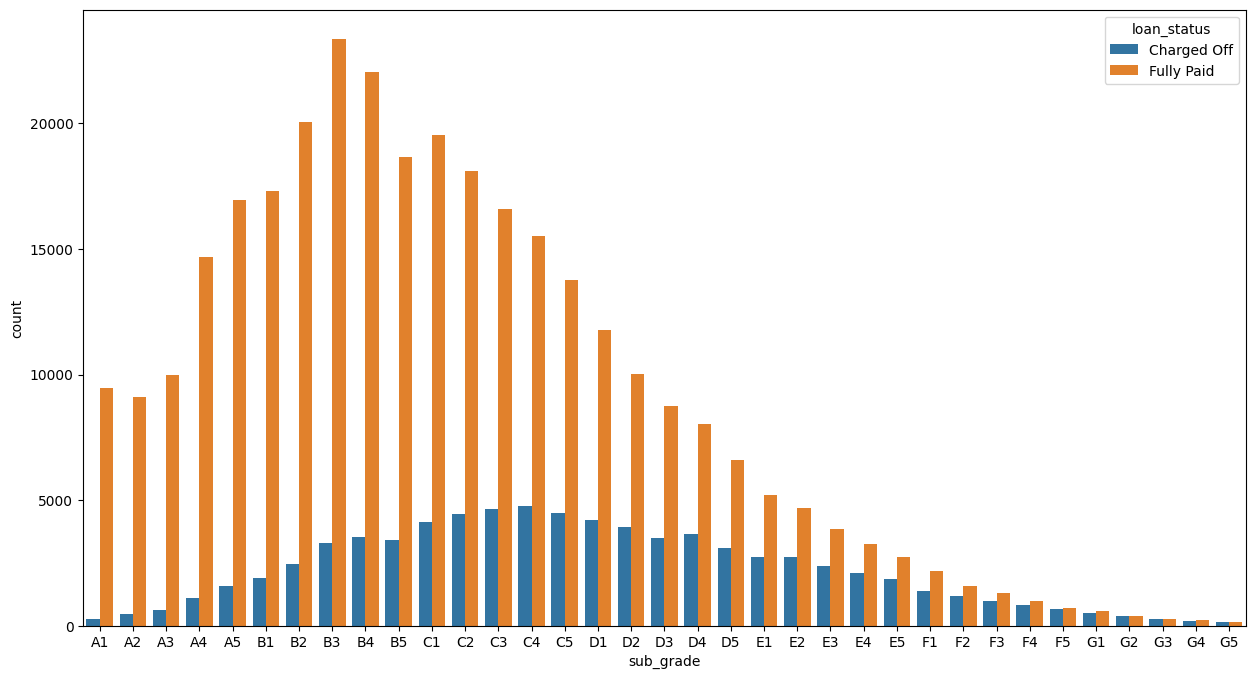

In [ ]:
#Comparative plot for loan status and sub grade
plt.figure(figsize=(15,8))
sns.countplot(data=df,x='sub_grade',hue='loan_status')
plt.show()

It is evident from the above graph that in almost all the sub_grade categories contain individuals who has completely paid their loan as opposed to charged off individuals.

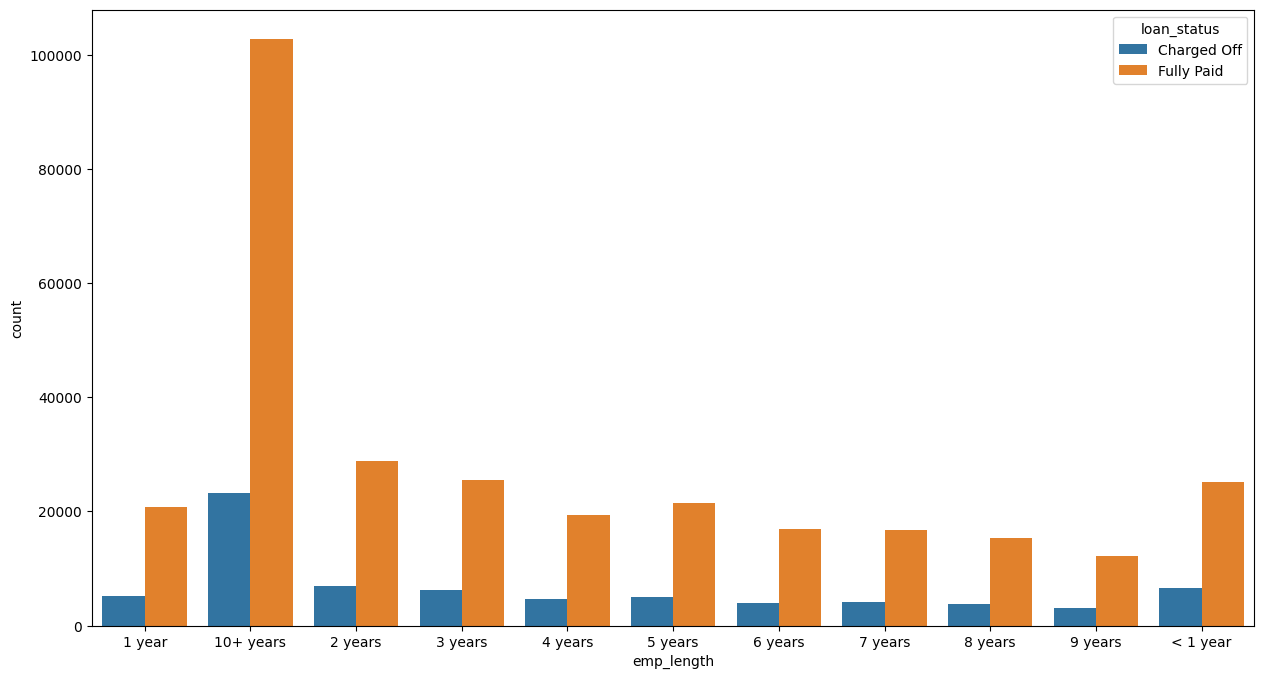

In [ ]:
#Comparitive plot for employee length and loan status
plt.figure(figsize=(15,8))
sns.countplot(data=df,x='emp_length',hue='loan_status')
plt.show()

It is evidently clear from the above plot that the people who has 10+ years of experience has paid their loan completely. Let's assume that those who have 10+ years of experience will get more payment and as a result they have the ability to repay the loan as quickly as possible.

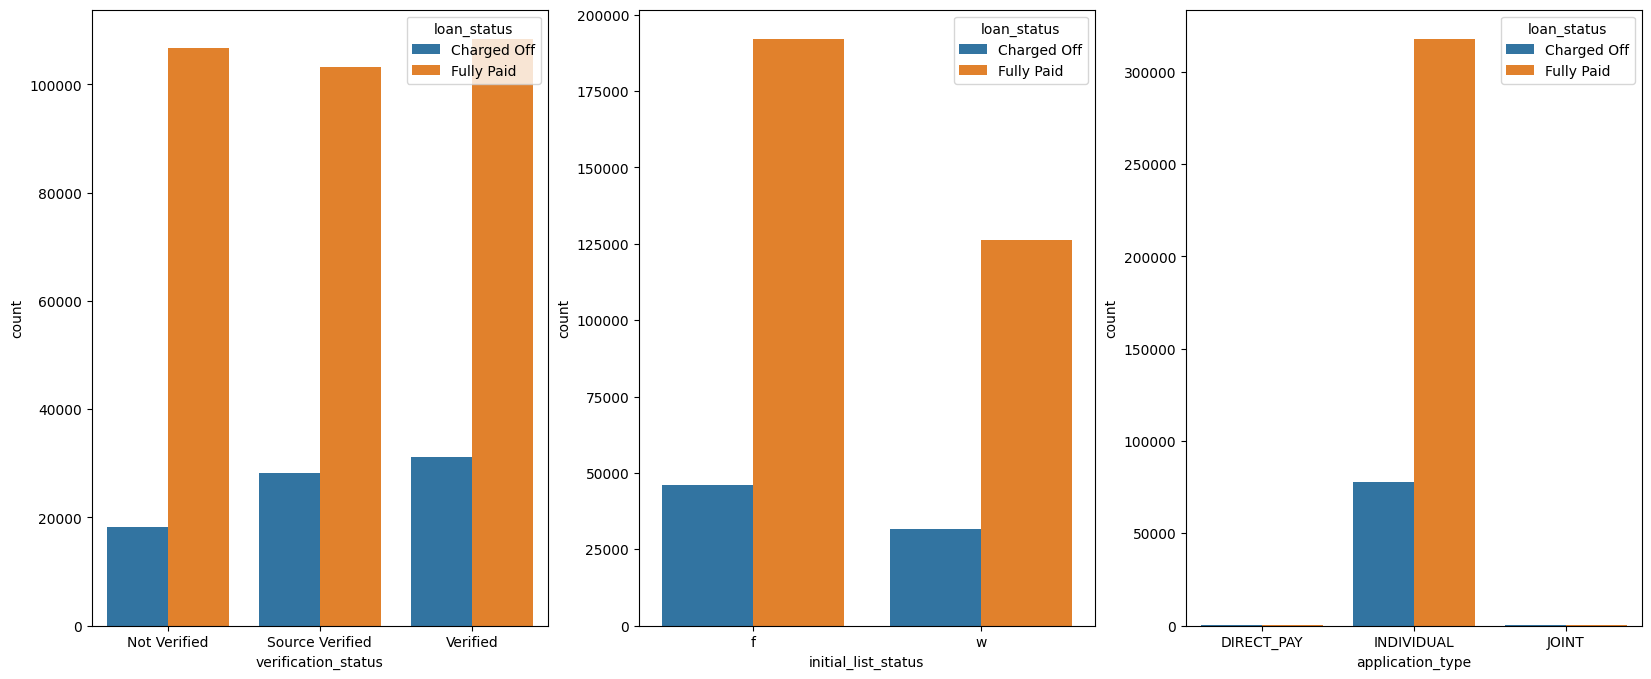

In [ ]:
#Comparitive plot for loan status vs verification status, initial_list_status and application type
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
sns.countplot(data=df,x='verification_status',hue='loan_status',ax=ax[0])
sns.countplot(data=df,x='initial_list_status',hue='loan_status',ax=ax[1])
sns.countplot(data=df,x='application_type',hue='loan_status',ax=ax[2])
plt.show()

Out of the three graphs it seems like fully paid customers are higher in all the categories. For instance, let's consider the graph verification status vs loan status, not verified, verified and source verified has shown significant amount of customers who has fully paid their loan. This pattern is also visible in different initial list status groups and application type groups.

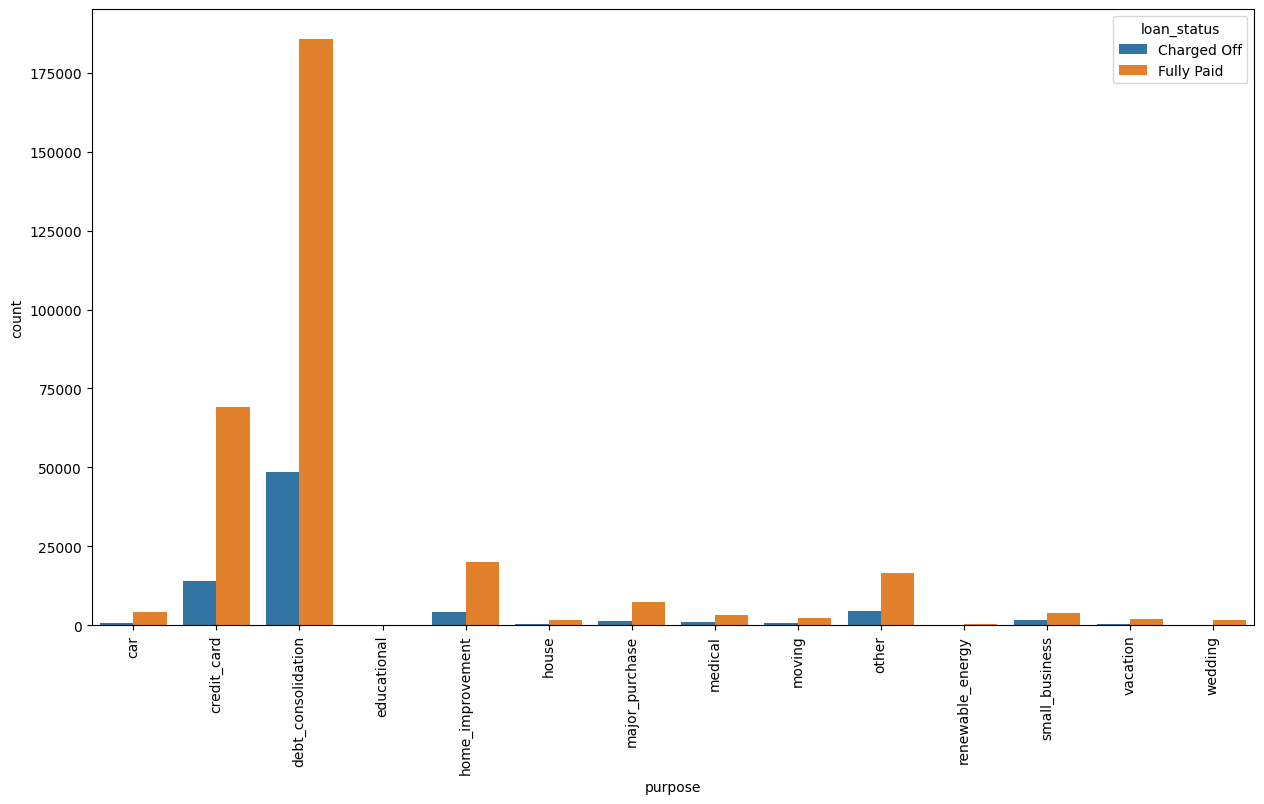

In [ ]:
#Comparitive plot for loan status vs purpose
plt.figure(figsize=(15,8))
sns.countplot(data=df,x='purpose',hue='loan_status')
plt.xticks(rotation=90)
plt.show()

It seems like debt conslidation applicants has paid their loan fully compared to other loan applicants.

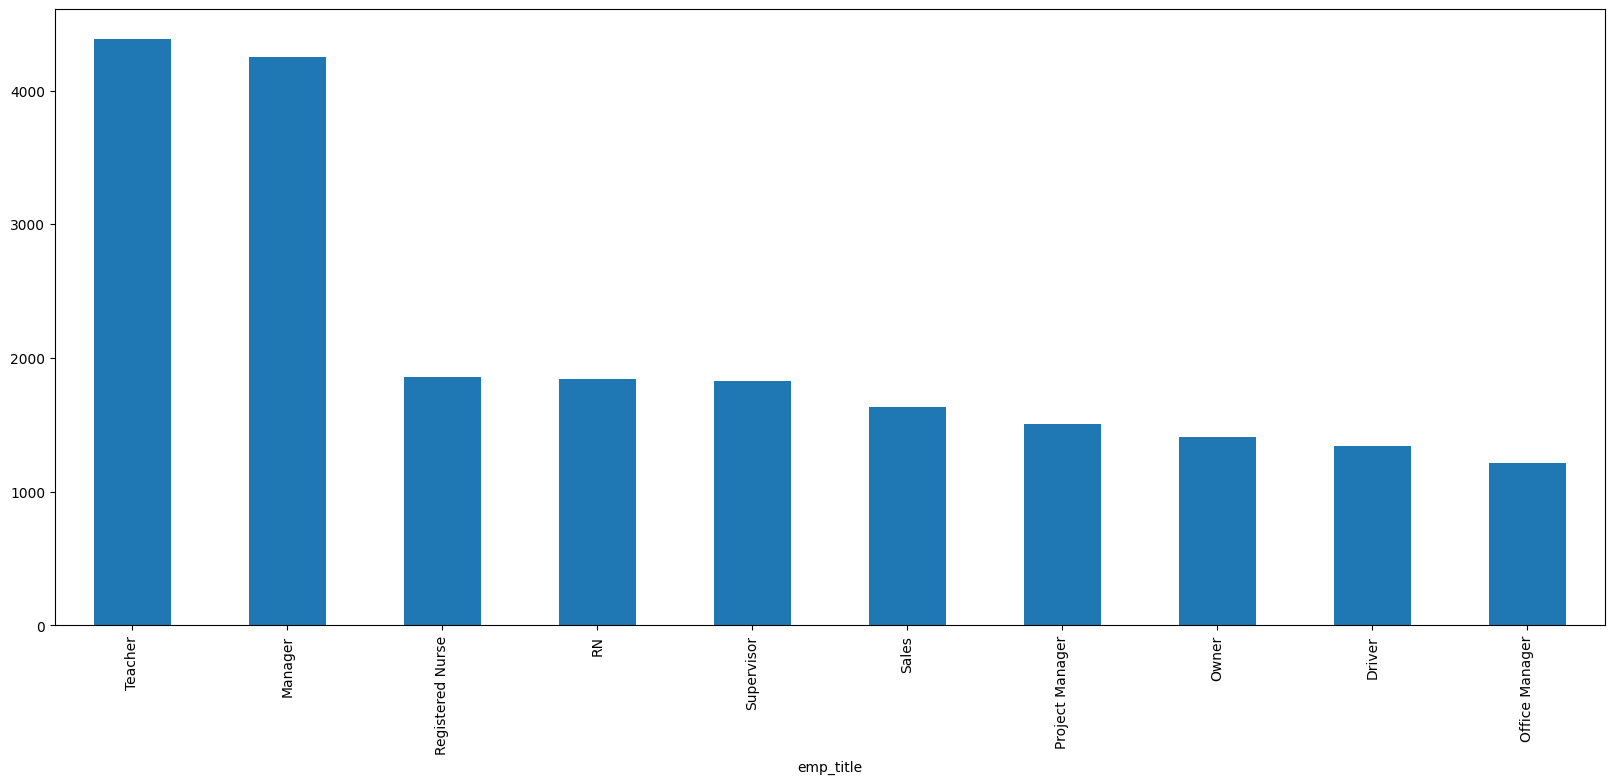

In [ ]:
#Top ten employment titles
plt.figure(figsize=(20,8))
df['emp_title'].value_counts().head(10).plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

From the above graph we can conclude that Teacher, Manager and Registered Nurse are the top three employment titles available in the loantap dataset.

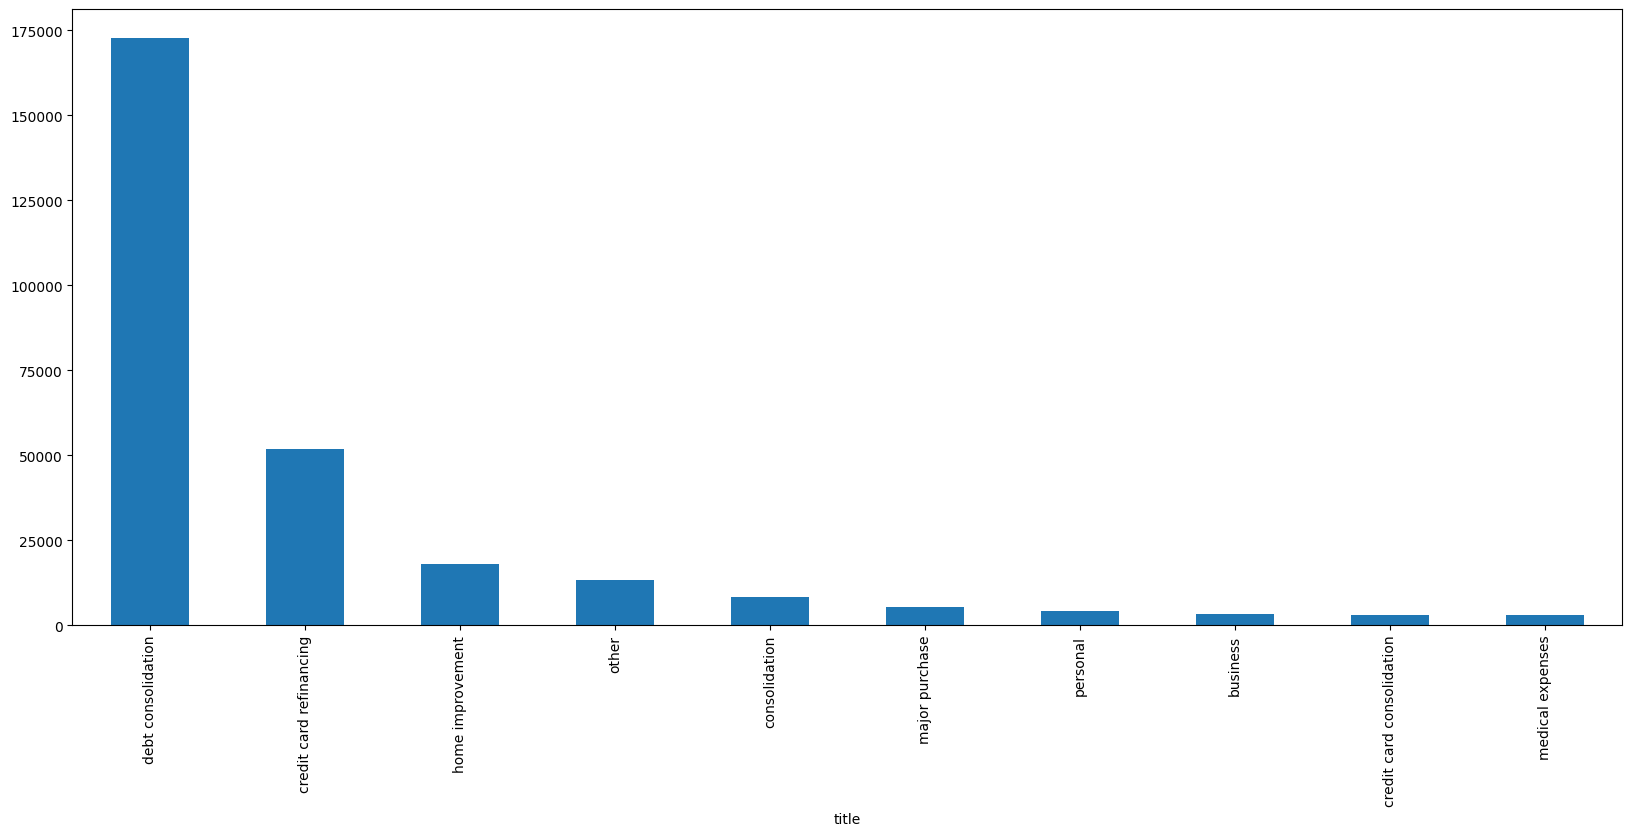

In [ ]:
#top ten loan titles available in the loantap dataset
plt.figure(figsize=(20,8))
df['title'] = df['title'].str.lower()
df['title'] = df['title'].str.replace('loan','')
df['title'] = df['title'].str.strip()
df['title'].value_counts().head(10).plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

It is clear from the above figure that the top 3 loan titles are debt consolidation, credit card refinancing and home improvement.

In [ ]:
#Extracting only cities from the address column and creating it as a seperate column.
df['city'] = df['address'].apply(lambda x: x[-8:-5] if len(x) >= 8 else x[:2])
df['city'] = df['city'].str.strip()
df['city'].head()

,city
0,OK
1,SD
2,WV
3,MA
4,VA


The city codes are extracted from the address column and kept as a new column.

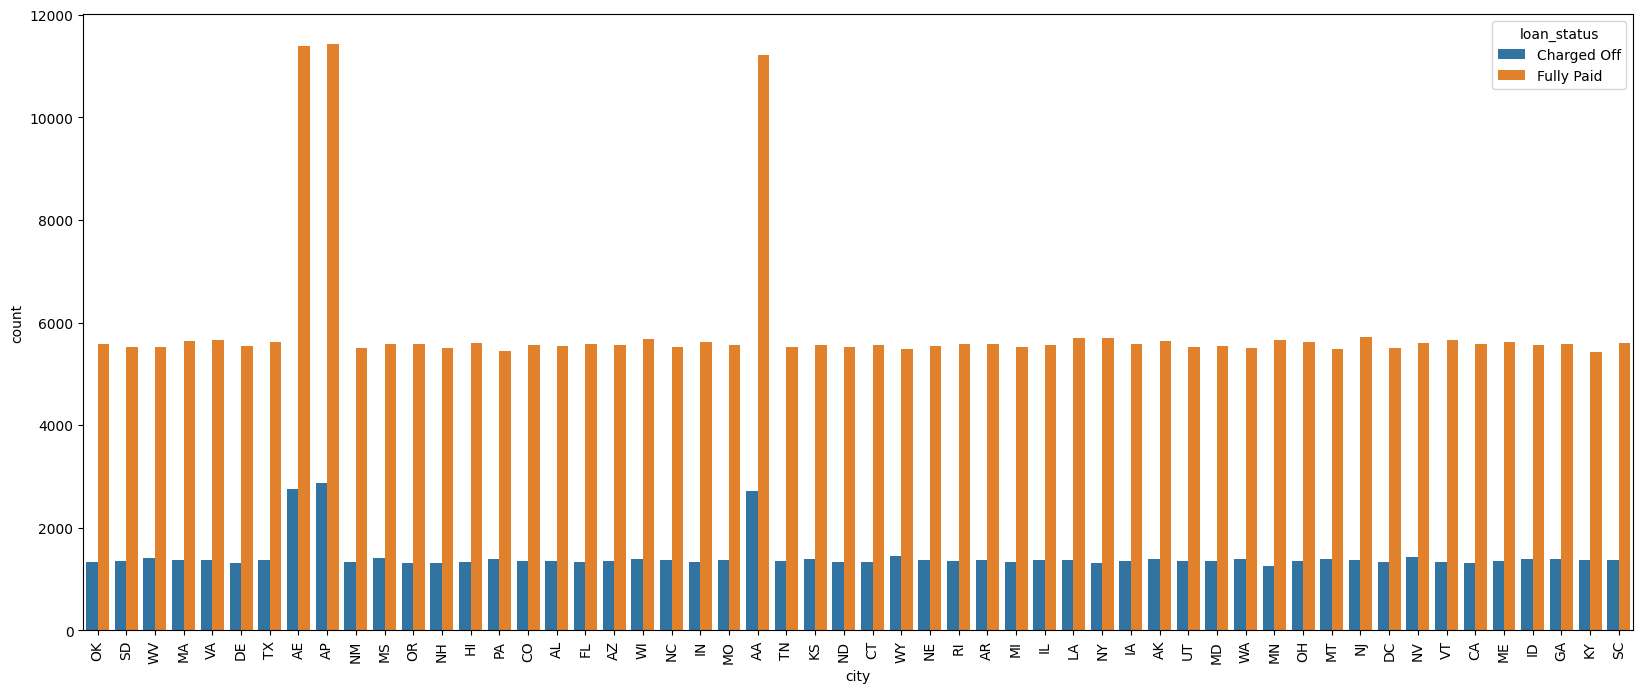

In [ ]:
#Plotting a comparative graph for city and loan status
plt.figure(figsize=(20,8))
sns.countplot(data=df,x='city',hue='loan_status')
plt.xticks(rotation=90)
plt.show()

As we can see from the above picture AE, AP and AA are the cities with highest amount of loan repayments. It is also seen that in all city categories fully paid applicants are higher compared to the charged off applicants.

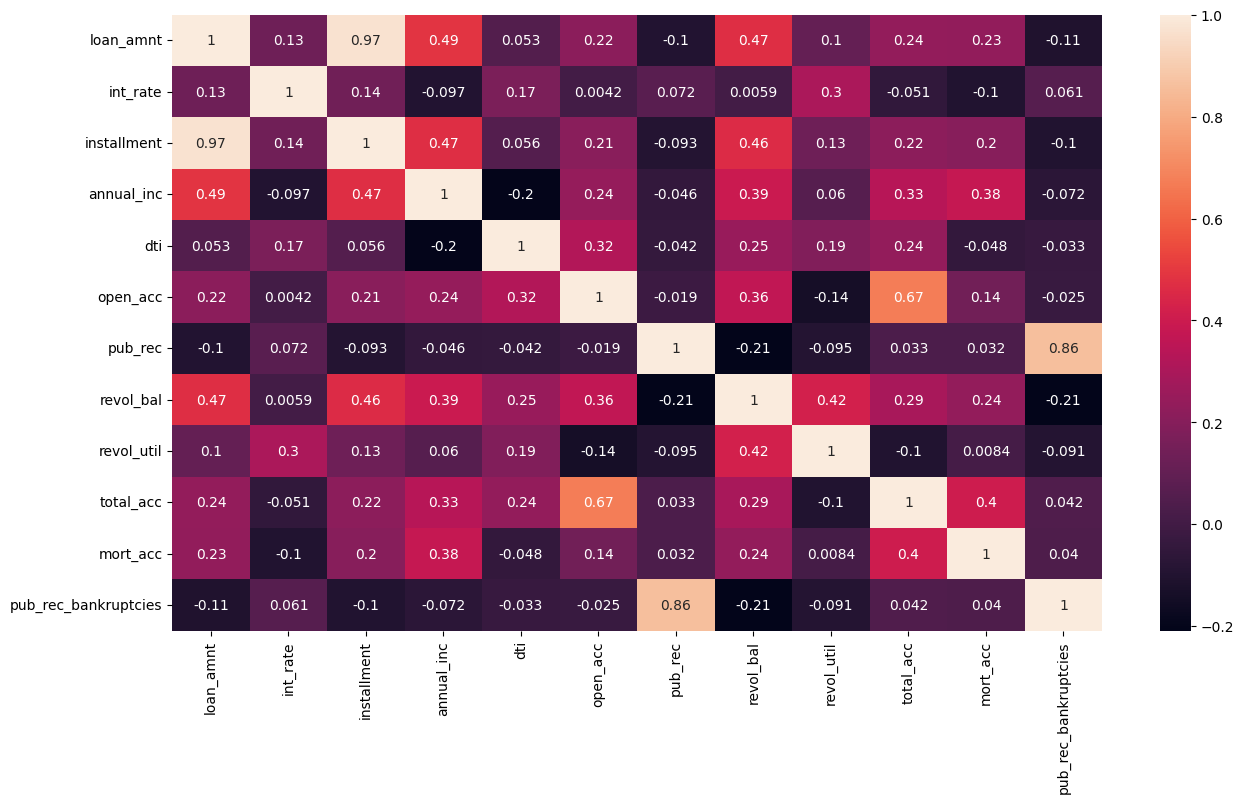

In [ ]:
#Plotting correlation plot among the features except the text columns
plt.figure(figsize=(15,8))
new_df = df.loc[:,df.dtypes == 'float64']
x = new_df.corr('spearman')
sns.heatmap(x,annot=True)
plt.show()

It seems like loan_amnt is highly correlated with the installment.

## Data Preprocessing

In [ ]:
#To check whether the dataset contains any duplicate values
df.duplicated().sum()

0

The dataset does not suffer from any duplicated values.

In [ ]:
#To check whther there's any null values in the dataset.
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


The dataset is suffering from missing values from columns such as emp_title, emp_length, title, revol_util, mort_acc, and pub_rec_bankruptcies. However, emp_title and emp_length does not required for model building and as a result we won't treat the missing values in these columns.

**Imputation strategy** - We have mort_acc and pub_rec_bankruptcies that contains missing values and to impute the missing values we use feature engineering technique first. If a value is greter than 1 is considered as 1 and rest of the value is considered as 0. It is then considered as a categorical column and use most frequent value to impute the missing values.

In [ ]:
#Feature engineering that is used to convert values greater than 1 to 1, less than or equal to 1 as 0 and null value to null value itself.
def categorize_value(x):
    if pd.isnull(x):  # Check for missing or 'Not Available'
        return x
    elif x > 1:
        return 1
    else:
        return 0

In [ ]:
#Applying feature engineering to these columns
df['pub_rec'] = df['pub_rec'].apply(categorize_value)
df['mort_acc'] = df['mort_acc'].apply(categorize_value)
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].apply(categorize_value)

In [ ]:
#Checking the most frequent value of mort_acc with respect to loan status.
df['mort_acc'] = df['mort_acc'].fillna(2)
pd.crosstab(df.mort_acc,df.loan_status)

loan_status,Charged Off,Fully Paid
mort_acc,,
0.0,45279,154914
1.0,26844,131198
2.0,5550,32245


The most frequent value is 0 and hence we replace the value 2.0 with 0.0

In [ ]:
#Imputing the missing value with the most frequent value.
df['mort_acc'] = df['mort_acc'].replace(2.0, 0.0)
df['mort_acc'].value_counts()

,count
mort_acc,
0.0,237988
1.0,158042


In [ ]:
#Checking the most frequent value of pub_rec_bankruptcies with respect to loan status.
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(2)
pd.crosstab(df.pub_rec_bankruptcies,df.loan_status)

loan_status,Charged Off,Fully Paid
pub_rec_bankruptcies,,
0.0,77048,316122
1.0,538,1787
2.0,87,448


The most frequent value is 0 and hence we replace the value 2.0 with 0.0

In [ ]:
#Imputing the missing value with the most frequent value.
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].replace(2.0, 0.0)
df['pub_rec_bankruptcies'].value_counts()

,count
pub_rec_bankruptcies,
0.0,393705
1.0,2325


In [ ]:
#Converting the following columns into int64
df['pub_rec'] = df['pub_rec'].astype('int64')
df['mort_acc'] = df['mort_acc'].astype('int64')
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].astype('int64')

In [ ]:
#Imputing revol_util with the median value in it.
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].median())
df['revol_util'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 396030 entries, 0 to 396029
Series name: revol_util
Non-Null Count   Dtype  
--------------   -----  
396030 non-null  float64
dtypes: float64(1)
memory usage: 3.0 MB


Null values in revol_util is replaced with the median value.

In [ ]:
#Selecting columns that are'nt category and necessary for building the ML model
non_categorical_data=df.select_dtypes(include=['int64','float64'])
non_categorical_columns=non_categorical_data.columns
non_categorical_columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

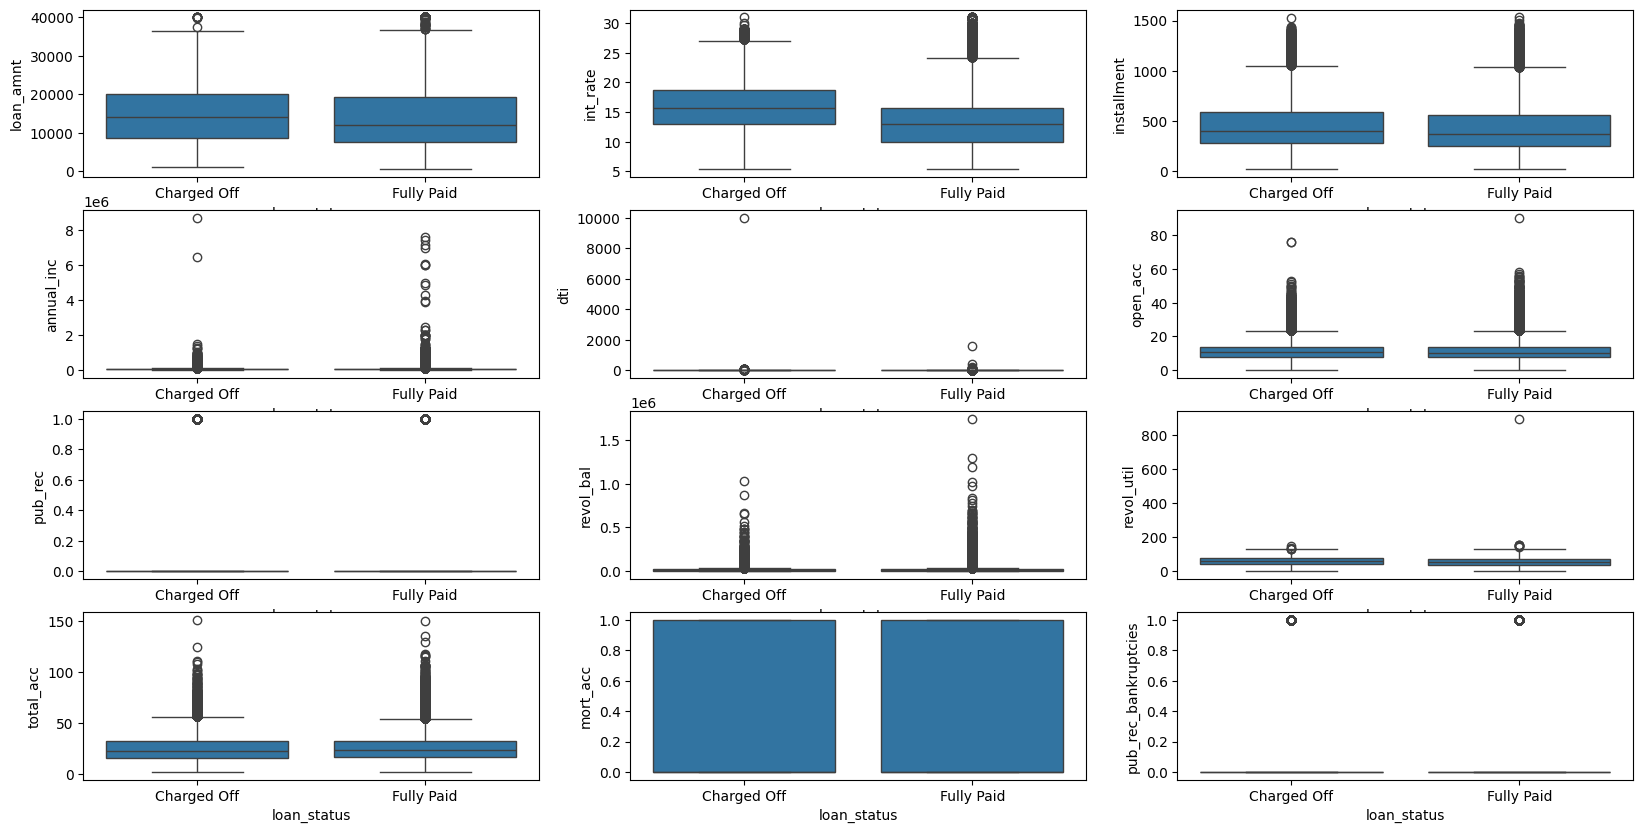

In [ ]:
#plotting box plots for outlier detection
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20,10))
for i, column in enumerate(non_categorical_columns):
    sns.boxplot(data=df, x='loan_status', y=column, ax=ax[i // 3, i % 3])
plt.tight_layout
plt.show()

In [ ]:
#Outlier treatment by removing the outliers
for col in non_categorical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
df.shape

(328188, 28)

Outliers has been removed and the new shape is displayed on the above output.

In [ ]:
#Dropping the column installment because it is highly correlated to loan_amnt
df.drop('installment',axis=1,inplace=True)

In [ ]:
#importing one hot encoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Defining one hot encoder
encoder = OneHotEncoder(sparse_output=False)

In [ ]:
#Transforming the term column and initial_list_status
encoded_array = encoder.fit_transform(df[['term','initial_list_status']])

In [ ]:
#transforming encded array into a dataframe
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['term','initial_list_status']))

In [ ]:
#Resetting the index axis
df = df.reset_index(drop=True)

In [ ]:
#Combining the encoded dataframe with the dataframe
df = pd.concat([df,encoded_df],axis=1)
df.shape

(328188, 31)

In [ ]:
#Dropping the unwanted columns
df = df.drop(['term','initial_list_status'],axis=1)
df = df.drop(['address','title','emp_title','earliest_cr_line','purpose','emp_length','grade','application_type','sub_grade','home_ownership','verification_status','issue_d'],axis=1)

In [ ]:
#Encoding the location with the average of loan amount
df['city'] = df.groupby('city')['loan_amnt'].transform('mean')
df['city'] = df['city'].round(2)
df['city'].head()

,city
0,12637.16
1,12656.28
2,12918.75
3,12736.65
4,12826.02


In [ ]:
#Creating feature and target variables in X and y
loan_status_values={'Charged Off': 0, 'Fully Paid':1}
df['loan_status'] = df.loan_status.map(loan_status_values)
X = df.copy()
y = df['loan_status']
X = df.drop('loan_status',axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Defining the std. scaler function
scaler = StandardScaler()

In [ ]:
#Performing standard scaler function on the Features
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,loan_amnt,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,city,term_ 36 months,term_ 60 months,initial_list_status_f,initial_list_status_w
0,-0.387706,-0.479881,1.904087,1.124852,1.276685,0.0,2.942498,-0.476681,0.136678,-0.750508,0.0,-2.007311,0.539761,-0.539761,-1.256607,1.256607
1,-0.662951,-0.351339,0.039289,0.602778,1.511443,0.0,0.981550,-0.003035,0.332342,1.332432,0.0,-1.794108,0.539761,-0.539761,0.795794,-0.795794
2,0.382979,-0.701908,-0.747620,-0.551017,0.572412,0.0,-0.001942,1.599128,0.234510,-0.750508,0.0,1.132646,0.539761,-0.539761,0.795794,-0.795794
3,-0.773048,-1.636758,-0.355188,-1.820691,-1.070892,0.0,-0.788712,-1.312771,-1.037307,-0.750508,0.0,-0.897917,0.539761,-0.539761,0.795794,-0.795794
4,1.590614,0.882663,-0.319326,2.085518,0.572412,0.0,1.519307,0.676546,1.897656,-0.750508,0.0,0.098631,-1.852673,1.852673,0.795794,-0.795794


### Model Building

In [ ]:
#Importing necessary library files for logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score

In [ ]:
#Splitting the data into training and test set for size in the ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Checking the size of training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((262550, 16), (65638, 16), (262550,), (65638,))

In [ ]:
#Defining the logistic regression model
model = LogisticRegression()

In [ ]:
#Fitting the logistic regression
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Looking for the coefficients for the model
model.coef_

array([[-0.12422614, -0.44007809,  0.21526767, -0.19786851, -0.11862018,
         0.        ,  0.09548315, -0.10530332,  0.09466957,  0.06925044,
         0.        ,  0.00861642,  0.09821818, -0.09821818,  0.0165174 ,
        -0.0165174 ]])

Given that there are 16 variables, the model produces 16 corresponding coefficients.

In [ ]:
#Displaying the intercept
model.intercept_

array([1.57712593])

The above value represents the slope of the given model.

In [ ]:
#Predicting the target values for unseen test data
y_pred = model.predict(X_test)

In [ ]:
#Displaying the accuracy score for the loantap dataset
accuracy_score = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy_score)

Accuracy Score: 0.8058137054754868


The accuracy score of **0.8058** indicates that our logistic regression model correctly predicts approximately 80.58% of the outcomes for loantap dataset. However, since our dataset is imbalanced, relying solely on accuracy as a performance metric can be misleading and we have to check for other metrics as well.

In [ ]:
#Displaying the confusion metrics
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
[[  766 12044]
 [  702 52126]]


True Negatives (TN) = 766: The model correctly predicted the negative class.

False Positives (FP) = 12,044: The model incorrectly predicted the positive class when the actual class was negative.

False Negatives (FN) = 702: The model incorrectly predicted the negative class when the actual class was positive.

True Positives (TP) = 52,126: The model correctly predicted the positive class.

In [ ]:
 #Displaying the classification report
 classification_report = classification_report(y_test, y_pred)
 print("Classification Report:")
 print(classification_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.06      0.11     12810
           1       0.81      0.99      0.89     52828

    accuracy                           0.81     65638
   macro avg       0.67      0.52      0.50     65638
weighted avg       0.76      0.81      0.74     65638



**Class 0/charged off (Minority Class)**:

**Precision (0.52)**: When the model predicts class 0, only 52% of those predictions are correct. This indicates a high false positive rate for class 0.

**Recall (0.06)**: Only 6% of the actual instances of class 0 are being correctly identified. This suggests the model is significantly biased against class 0 and struggles to capture most of its instances.

**F1-Score (0.11)**: The low F1-score indicates poor overall performance for class 0, as both precision and recall are suboptimal.

**Class 1/Fully paid (Majority Class)**:

**Precision (0.81)**: When the model predicts class 1, 81% of those predictions are correct. This is a decent precision score.

**Recall (0.99)**: The model captures 99% of the actual instances of class 1, which is excellent and shows a very low false negative rate.

**F1-Score (0.89)**: The high F1-score indicates strong performance for class 1, as precision and recall are both high.

In [ ]:
#Calculation of TRP, FPR and thresholds
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # True Positive Rate (TPR) and False Positive Rate (FPR)
roc_auc = roc_auc_score(y_test, y_prob) # AUC Score

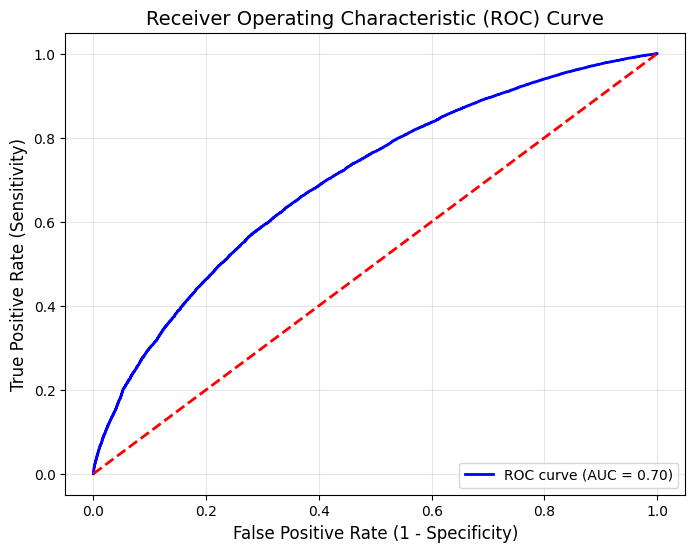

In [ ]:
#Plotting AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)  # Diagonal line (random guessing)
plt.xlabel("False Positive Rate (1 - Specificity)", fontsize=12)
plt.ylabel("True Positive Rate (Sensitivity)", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=14)
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

The AUC-ROC curve (Area Under the Curve - Receiver Operating Characteristic curve) is a graphical representation of a classifier's performance across various thresholds.

Since our AUC value is 0.70 we can say that our model is a fair model and neither an excellent nor a good model. When a model is fair it has a fair ability to classify between class 0 and class 1.



In [ ]:
#Compute precision & recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

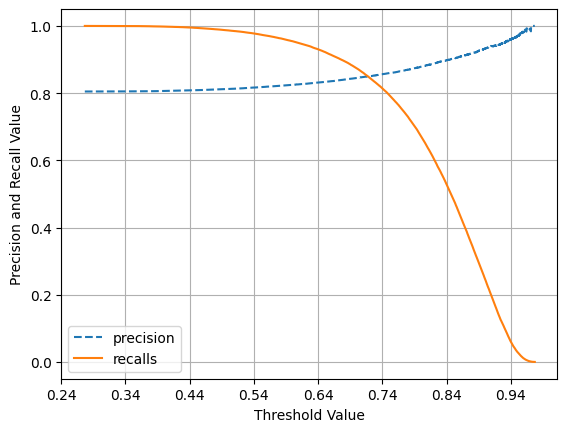

In [ ]:
#Plotting precision-recall curve
threshold_boundary = thresholds.shape[0]
#plot precision
plt.plot(thresholds,precision[0:threshold_boundary],linestyle='--',label='precision')
#plot recall
plt.plot(thresholds,recall[0:threshold_boundary],label='recalls')

start,end=plt.xlim()
plt.xticks(np.round(np.arange(start,end,0.1),2))

plt.xlabel('Threshold Value')
plt.ylabel('Precision and Recall Value')
plt.legend()
plt.grid()
plt.show()

The above graph has high recalls and low precisions. This means that the model identifies most positives, but it also includes many false positives.

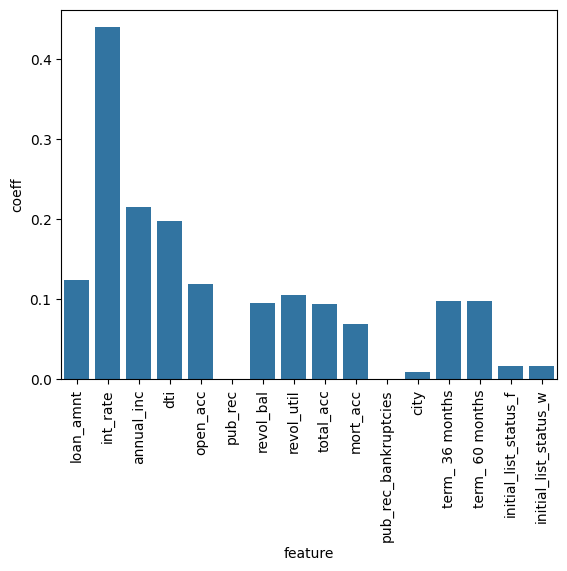

In [ ]:
#Checking the importance of each feature
coefficients = np.abs(model.coef_[0])  # Assuming a single set of coefficients
imp = pd.DataFrame({'feature': X_test.columns, 'coeff': coefficients})
sns.barplot(x='feature', y='coeff', data=imp)
plt.xticks(rotation=90)
plt.show()

From the above figure we can say that interest rate, annual income, dti, loan amount, open_account are some of the important features.

### Sampling using SMOTE

In [ ]:
#Checking for class imbalance
y.value_counts()

,count
loan_status,
1,264148
0,64040


In [ ]:
#Percentage of class imbalance
print("% of class 1 :", (264148/(264148+64040)))
print("% of class 0 :", (64040/(264148+64040)))

% of class 1 : 0.8048679415456994
% of class 0 : 0.1951320584543006


The dataset is imbalanced due to small proportion of class 0

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#Performing SMOTE
sm=SMOTE(random_state=42)
X_train_res,y_train_res=sm.fit_resample(X_train,y_train.ravel())

<ipython-input-316-325456e82556>:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_res,y_train_res=sm.fit_resample(X_train,y_train.ravel())
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scik

In [ ]:
#Size and shape of the data after oversampling using SMOTE
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (422640, 16)
After OverSampling, the shape of train_y: (422640,) 

After OverSampling, counts of label '1': 211320
After OverSampling, counts of label '0': 211320


In [ ]:
#Defining the logistic regression model
sample_model = LogisticRegression()

In [ ]:
#Fitting the logistic regression model
sample_model.fit(X_train_res, y_train_res)

LogisticRegression()

In [ ]:
#Predicting new target values afte sampling using SMOTE
new_y_pred = sample_model.predict(X_test)

In [ ]:
#Calculating the new accuracy values
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score
new_accuracy_score = accuracy_score(y_test, new_y_pred)
print("Accuracy Score:", new_accuracy_score)

Accuracy Score: 0.6518327797921936


Accuracy score has reduced after sampling the data. This does not implies that our model is worser than the previous one. Lets consider confusion matrix and classification report.

In [ ]:
#Displaying new confusion matrix
new_confusion_matrix = confusion_matrix(y_test, new_y_pred)
print("Confusion Matrix:")
print(new_confusion_matrix)

Confusion Matrix:
[[ 8127  4683]
 [18170 34658]]


**True Negatives (TN)** : The model correctly predicted 8127 instances as negative, and they were actually negative.

**False Positives (FP)** : The model incorrectly predicted 4683 instances as positive, but they were actually negative.

**False Negatives (FN)** : The model incorrectly predicted 18170 instances as negative, but they were actually positive. These are "missed detections" and can be costly in certain applications.

**True Positives (TP)** : The model correctly predicted 34658 instances as positive, and they were actually positive.

In [ ]:
#Displaying new classification report
new_classification_report = classification_report(y_test, new_y_pred)
print("Classification Report:")
print(new_classification_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.63      0.42     12810
           1       0.88      0.66      0.75     52828

    accuracy                           0.65     65638
   macro avg       0.60      0.65      0.58     65638
weighted avg       0.77      0.65      0.69     65638



Class 0 / charged off (Minority Class):

**Precision: 0.31**
Out of all the instances predicted as class 0, only 31% are actually class 0. This indicates a high proportion of false positives for class 0.
**Recall: 0.63**
Out of all the actual class 0 instances, 63% are correctly identified as class 0. This shows the model is relatively good at detecting class 0 but not perfect.
**F1-Score: 0.42**
A harmonic mean of precision and recall. The low value (42%) suggests the model struggles with class 0, especially due to the low precision.

Class 1 (Majority Class):

**Precision: 0.88**
Out of all the instances predicted as class 1, 88% are correctly classified as class 1. This shows very few false positives for class 1.
**Recall: 0.66**
Out of all the actual class 1 instances, 66% are correctly identified. This indicates the model misses some actual class 1 instances (false negatives).
**F1-Score: 0.75**
The balance between precision and recall is strong, indicating the model performs well for class 1.

In [ ]:
new_y_prob = sample_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, new_y_prob) #Calculating precision and recalls

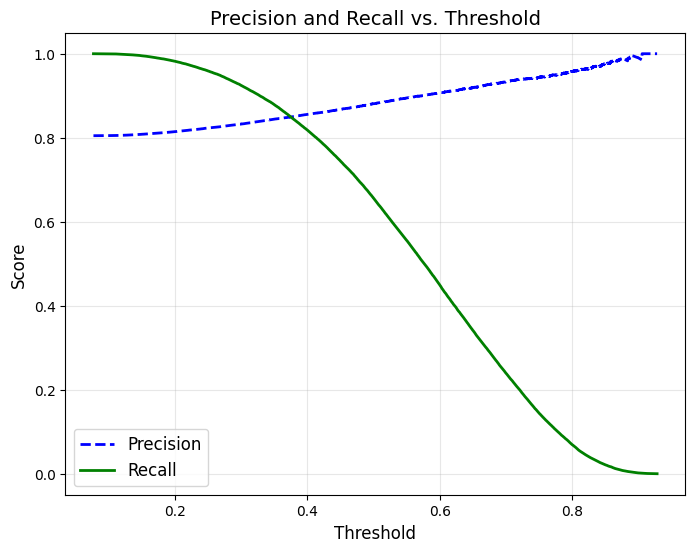

In [ ]:
#Plotting precision recall curve
plt.figure(figsize=(8, 6))
# Precision curve
plt.plot(thresholds, precision[:-1], 'b--', label="Precision", lw=2)
# Recall curve
plt.plot(thresholds, recall[:-1], 'g-', label="Recall", lw=2)
# Adding labels, title, and legend
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Precision and Recall vs. Threshold", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

The above graph has high recalls and low precisions. This means that the model identifies most positives, but it also includes many false positives.

**Questionnaire**

**Q, What percentage of customers have fully paid their Loan Amount?**

A, The dataset contains approximately 80% of fully paid customers and 20% of charged off customers in it.

**Q, Comment about the correlation between Loan Amount and Installment features?**

A, Loan amount is highly correlated with the installment and has a correlation value of 0.97.

**Q, The majority of people have home ownership as _______?**

A, The majority of people have home ownership as mortgage.

**Q, People with grades ‘A’ are more likely to fully pay their loan. (T/F)**

A, **False**, People with grades B are more likely to fully pay their loan.

**Q, Name the top 2 afforded job titles?**

A, Teacher and Manager are the 2 affordable job titles available in the loantap dataset.

**Q, Thinking from a bank's perspective, which metric should our primary focus be on?**

> ROC-AUC

> Precision

> Recall

> F1 Score

A, Precision will be an ideal choice because our goal is to reduce the false positives and can use F1-score as a secondary metric to balance out precision and recall.

**Q, How does the gap in precision and recall affect the bank?**

A, low precision - high recall means that the model identifies most defaulters (high recall), but many fully paid loans are incorrectly classified as defaulters (low precision). This indicates a higher rate of false positives: Fully paid loans classified as "charged off."

**Q, Which were the features that heavily affected the outcome?**

A, interest rate, annual income, dti, loan amount, open_account are some of the important features that has a serious impact on the outcome. (From feature importance graph)

**Q, Will the results be affected by geographical location? (Yes/No)**

A, Yes, there's a small contribution that has affected the outcome while considering the geographical location. (From feature importance graph)


**Recommendations**

> We can say that our model fairly classifies charged off and fully paid customers.

> Since there's a class imbalance between charged off (minority class) and fully paid (majority class) we found that there's a high chance of false positives. That means, the model incorrectly predicts some instances as positive or fully paid, but they were actually defaulters. As a result we need almost equal proportion of charged off and fully paid customers.

**Q, How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.**

A, We have to aim for a high precision value for the minority class (charged off) and A precision value close to 1 ensures fewer false positives. We also need to monitor recall to ensure you are still capturing a reasonable number of defaulters. Therefore, it is recommended to balance out precision and recall if recall drops too low.

**Q, Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone?**

A, Given NPA is a real concern, the bank should aim for a balanced strategy rather than an extreme approach of disbursing no loans and some of them are:

> Adjust the decision threshold in favor of recall, ensuring more defaulters are identified, even at the cost of some false positives.

> Apply stricter criteria (higher thresholds) for high-risk borrower profiles while being more lenient for low-risk borrowers.

> For applicants near the decision threshold, involve manual review to minimize errors.